In [1]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import matplotlib.animation as animation

In [2]:
print(load_iris()['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

## 3. (a)

Classa reassignment in the below cell to Virginica and Non Virginica

In [3]:
dataset = load_iris()['data']
target = load_iris()['target']
target[:100] = -1
target[100:] = 1
df = pd.DataFrame(dataset)
df = df.rename( columns={0: "SL", 1: "SW", 2:"PL",3:"PW"})
df = df.assign(IsVirginica=pd.Series(target))
weight = np.ones(len(dataset))/len(dataset)

Initial Visualisation of the dataset

Text(0.5, 1.0, 'Distribution Plot (Virginica=1)')

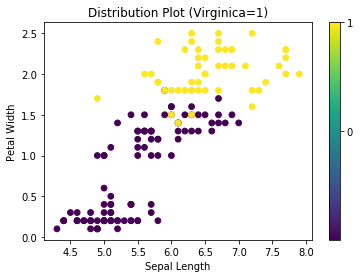

In [4]:
plt.scatter(np.array(df['SL']), np.array(df['PW']),c=df['IsVirginica'],s = weight*5000)
plt.colorbar(ticks = [0,1])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('Distribution Plot (Virginica=1)')

In [5]:
import time

In [6]:
pl = []
def adaboost(df, wt):
    weights = np.copy(wt)
    alpha_m_ = []
    final = []
    print('Initial Distribution')
    plt.scatter(np.array(df['SL']), np.array(df['PW']),c=df['IsVirginica'],s = wt*5000)
    plt.colorbar(ticks = [0,1])
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Width')
    plt.title('Distribution Plot (Virginica=1)')
    plt.show()
    for i in range(10):
        dt = tree.DecisionTreeClassifier(max_depth=1)
        dt.fit(df[['SL','PW']],df["IsVirginica"],sample_weight=weights)
        predicted = dt.predict(df[['SL','PW']])
        ground_truth = df['IsVirginica']
        error = sum(weights[(np.nonzero(predicted - ground_truth)[0])])/sum(weights)
        alpha_m = 0.5*np.log((1-error)/error)
        alpha_m_.append(alpha_m)
        weights[np.nonzero(predicted - ground_truth)[0]]*=np.exp(alpha_m)
        weights[np.delete(np.arange(len(df)),(np.nonzero(predicted - ground_truth)[0]))]*=np.exp(-alpha_m)
        weights = weights/sum(weights)
        final.append(predicted)
        print("alpha_m for iteration ",i," is",alpha_m)
        print("Accuracy of current decision tree is, ",accuracy_score(ground_truth,predicted))
        fig = plt.figure(figsize = (7,5))
        plt.scatter(np.array(df['SL']), np.array(df['PW']),c=df['IsVirginica'],s = weights*5000)
        plt.colorbar(ticks = [0,1])
        plt.xlabel('Sepal Length')
        plt.ylabel('Petal Width')
        plt.title('Distribution Plot (Virginica=1)')
        pl.append(fig)
        plt.show()
    return alpha_m_, final

Initial Distribution


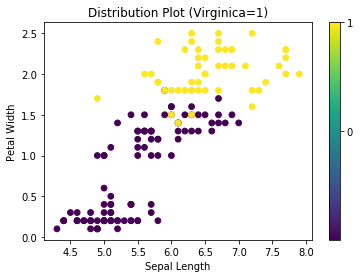

alpha_m for iteration  0  is 1.589026915173974
Accuracy of current decision tree is,  0.96


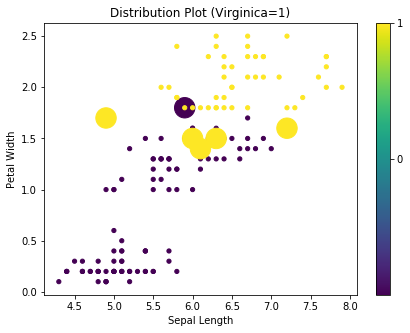

alpha_m for iteration  1  is 0.8431994767851143
Accuracy of current decision tree is,  0.8533333333333334


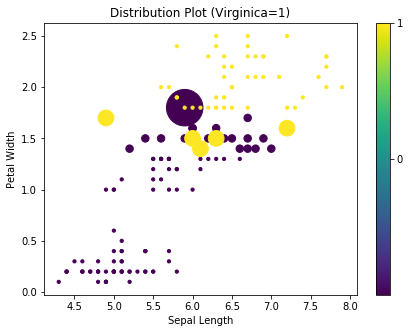

alpha_m for iteration  2  is 0.510017517666048
Accuracy of current decision tree is,  0.7933333333333333


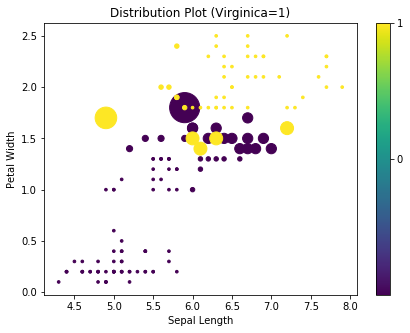

alpha_m for iteration  3  is 0.5615790747790678
Accuracy of current decision tree is,  0.8933333333333333


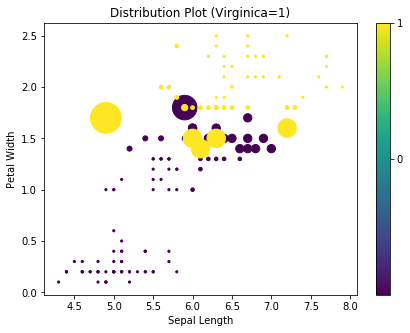

alpha_m for iteration  4  is 0.26733206762830497
Accuracy of current decision tree is,  0.5333333333333333


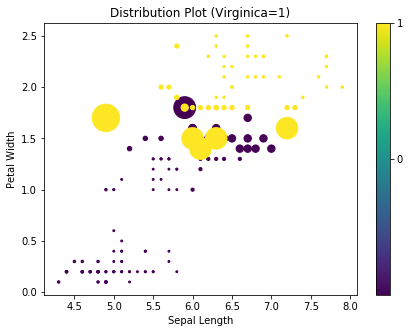

alpha_m for iteration  5  is 0.42735961221211927
Accuracy of current decision tree is,  0.8533333333333334


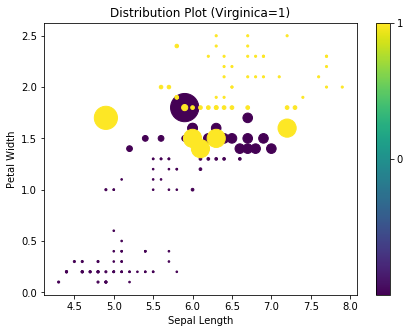

alpha_m for iteration  6  is 0.2763132661656925
Accuracy of current decision tree is,  0.7466666666666667


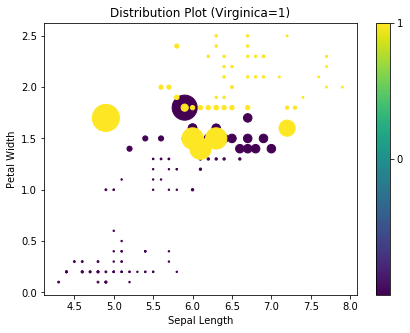

alpha_m for iteration  7  is 0.13961109395368254
Accuracy of current decision tree is,  0.5333333333333333


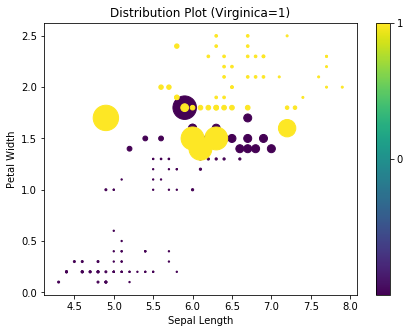

alpha_m for iteration  8  is 0.3185961077785886
Accuracy of current decision tree is,  0.8533333333333334


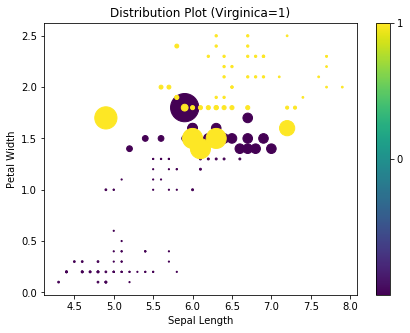

alpha_m for iteration  9  is 0.2401235942026898
Accuracy of current decision tree is,  0.5333333333333333


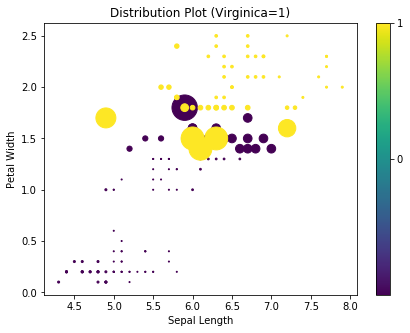

In [7]:
a,b = adaboost(df,weight)

In [8]:
new_arr = np.zeros(len(df))
for i in range(len(b)):
    new_arr+=b[i]*a[i]

In [9]:
np.sign(new_arr)
gt = df['IsVirginica']
accuracy_score(gt, np.sign(new_arr))

0.96

## 3. (b)

Text(0.5, 1.0, 'Distribution Plot (Virginica=1)')

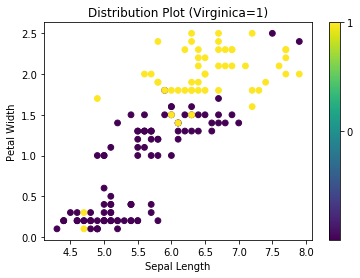

In [10]:
new_df = df.copy()
val1 = np.array(new_df[:100])
val2 = np.array(new_df[100:])
val1 = np.append(val1,np.array([[7.5,3,5.4,2.5,-1]]),axis = 0)
val1 = np.append(val1,np.array([[7.9,3,5.7,2.4,-1]]),axis = 0)
val2 = np.append(val2,np.array([[4.7,3,3,0.3,1]]),axis=0)
val2 = np.append(val2,np.array([[4.7,3,3,0.1,1]]),axis=0)
new_df_temp = np.append(val1,val2, axis = 0)
ndf = pd.DataFrame(new_df_temp)
ndf = ndf.rename( columns={0: "SL", 1: "SW", 2:"PL",3:"PW",4:"IsVirginica"})
plt.scatter(np.array(ndf['SL']), np.array(ndf['PW']),c=ndf['IsVirginica'],s = weight*5000)
plt.colorbar(ticks = [0,1])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('Distribution Plot (Virginica=1)')

Initial Distribution


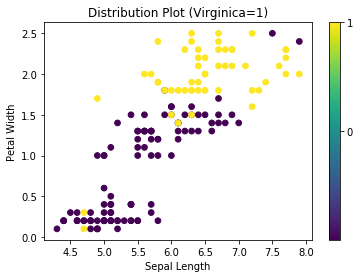

alpha_m for iteration  0  is 1.3336141032909752
Accuracy of current decision tree is,  0.935064935064935


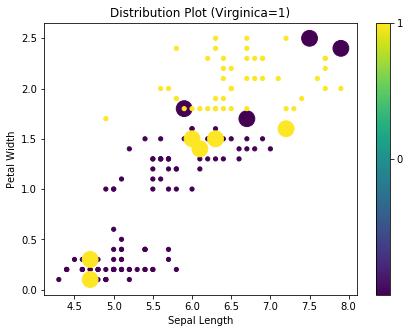

alpha_m for iteration  1  is 0.3003869302144645
Accuracy of current decision tree is,  0.7727272727272727


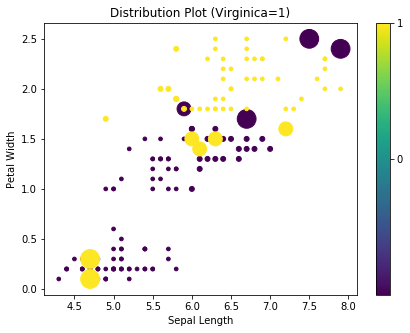

alpha_m for iteration  2  is 0.3687272221432584
Accuracy of current decision tree is,  0.6038961038961039


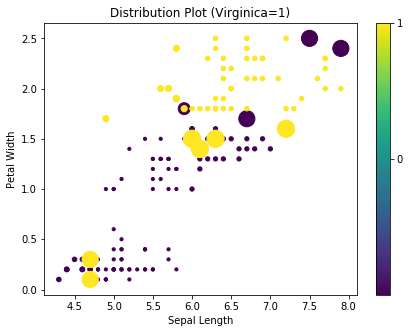

alpha_m for iteration  3  is 0.2835347467666331
Accuracy of current decision tree is,  0.3116883116883117


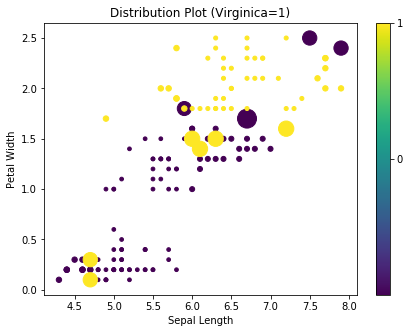

alpha_m for iteration  4  is 0.2742166868886139
Accuracy of current decision tree is,  0.8311688311688312


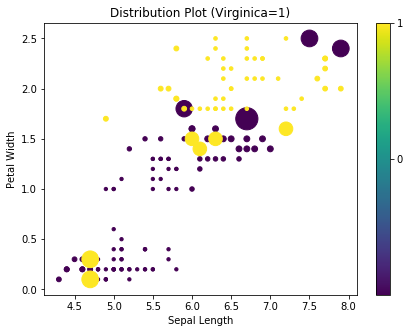

alpha_m for iteration  5  is 0.32628072116523
Accuracy of current decision tree is,  0.6038961038961039


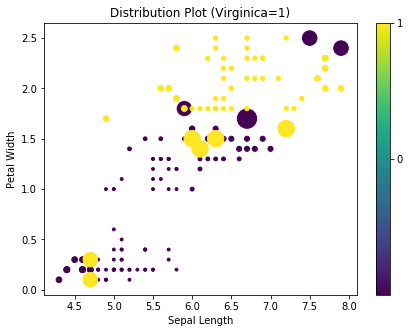

alpha_m for iteration  6  is 0.1443172831352923
Accuracy of current decision tree is,  0.3961038961038961


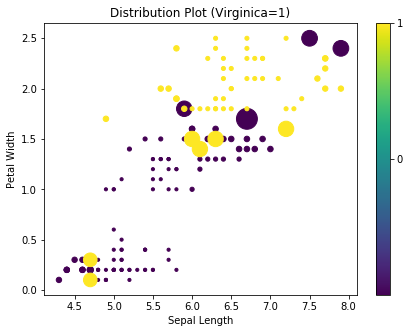

alpha_m for iteration  7  is 0.1635636018957507
Accuracy of current decision tree is,  0.8311688311688312


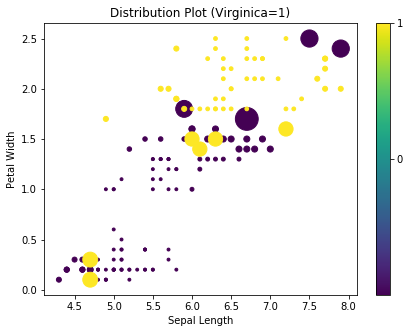

alpha_m for iteration  8  is 0.18159540112770653
Accuracy of current decision tree is,  0.6623376623376623


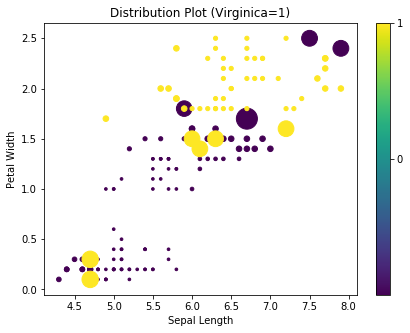

alpha_m for iteration  9  is 0.1547763777560042
Accuracy of current decision tree is,  0.3116883116883117


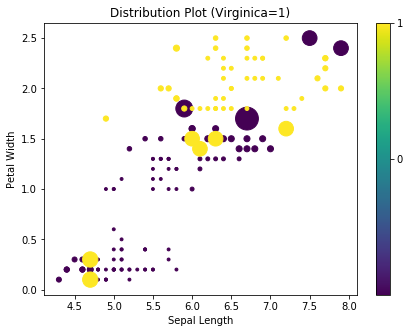

In [11]:
wet = np.ones(len(ndf))/len(ndf)
a1,b1 = adaboost(ndf,wet)

In [12]:
new_arr_1 = np.zeros(len(ndf))
for i in range(len(b)):
    new_arr_1+=b1[i]*a1[i]
np.sign(new_arr_1)
gt1 = ndf['IsVirginica']
accuracy_score(gt1, np.sign(new_arr_1))

0.935064935064935

In [13]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier?

In [19]:
model= AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1))

In [20]:
model.fit(ndf[['SL','PW']],ndf["IsVirginica"])

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [21]:
model.predict(ndf[['SL','PW']])

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [23]:
accuracy_score(model.predict(ndf[['SL','PW']]),ndf['IsVirginica'])

0.961038961038961